In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import OneClassSVM

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df=df.drop(['petal length (cm)','petal width (cm)'],axis=1)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
model=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.05).fit(df)
y_pred=model.predict(df)

In [16]:
anomaly_values = df.iloc[np.where(y_pred == -1)]
print(anomaly_values)

     sepal length (cm)  sepal width (cm)
8                  4.4               2.9
13                 4.3               3.0
41                 4.5               2.3
117                7.7               3.8
118                7.7               2.6
131                7.9               3.8


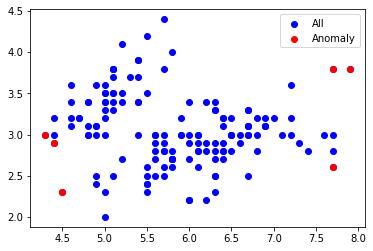

In [23]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='blue',label='All')
plt.scatter(anomaly_values['sepal length (cm)'],anomaly_values['sepal width (cm)'],color='red',label='Anomaly')
plt.legend()
plt.show()